In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tejvarshith
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression


100%|██████████| 24.3k/24.3k [00:00<00:00, 47.2MB/s]

In [3]:
import pandas as pd
dataset = pd.read_csv("/content/second-hand-used-cars-data-set-linear-regression/train.csv")

In [4]:
dataset.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [70]:
dataset.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [49]:
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Normalization,InputLayer,Dense
from tensorflow.keras.losses import MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

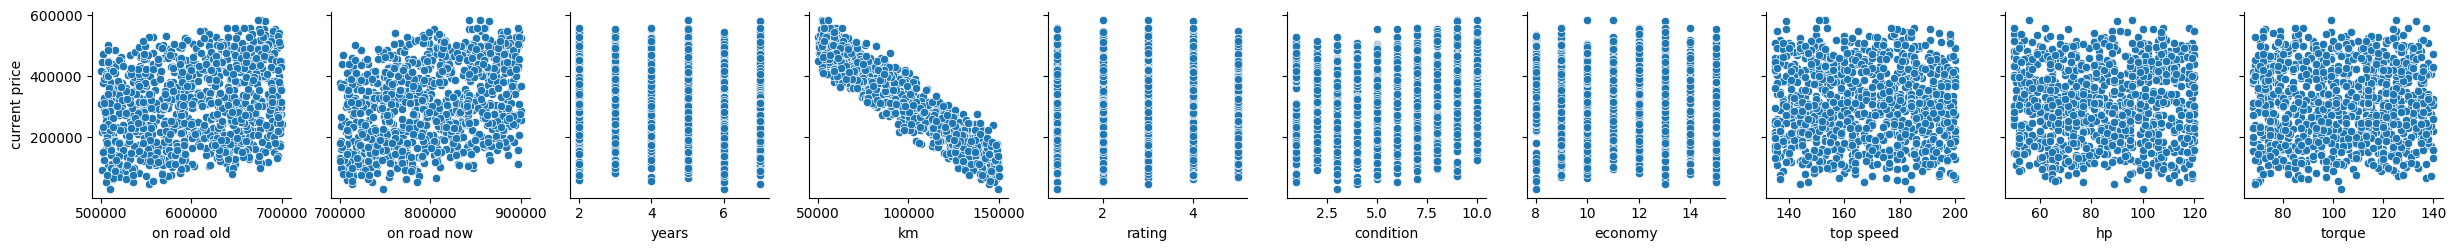

In [10]:
sns.pairplot(
    dataset,
    x_vars=['on road old','on road now','years','km','rating','condition','economy','top speed','hp','torque'],
    y_vars=['current price'],
    diag_kind='kde'
)

In [16]:
tensor_data = tf.constant(dataset)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float64, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]])>

In [17]:
X = tensor_data[:,3:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y,axis=-1)

In [18]:
X[:1]

<tf.Tensor: shape=(1, 8), dtype=float64, numpy=
array([[3.0000e+00, 7.8945e+04, 1.0000e+00, 2.0000e+00, 1.4000e+01,
        1.7700e+02, 7.3000e+01, 1.2300e+02]])>

In [19]:
y[:1]

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[351318.]])>

In [21]:
Train_Ratio=0.6
Valid_Ratio=0.2
Test_Ratio=0.2

In [29]:
X_train,X_val,X_test = X[:int(Train_Ratio*len(X))],X[int(Train_Ratio*len(X)):int(Train_Ratio*len(X))+int(Valid_Ratio*len(X))],X[int(Train_Ratio*len(X))+int(Valid_Ratio*len(X)):]
y_train,y_val,y_test = y[:int(Train_Ratio*len(y))],y[int(Train_Ratio*len(y)):int(Train_Ratio*len(y))+int(Valid_Ratio*len(y))],y[int(Train_Ratio*len(y))+int(Valid_Ratio*len(y)):]

In [23]:
normalizer = Normalization()
X_train = normalizer.adapt(X_train)
X_val = normalizer(X_val)
X_test = normalizer(X_test)

In [58]:
loss = MeanAbsoluteError()
optimizer = Adam(learning_rate = 0.001)
metrics = [RootMeanSquaredError()]

In [31]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [34]:
train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [51]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1],)),
    normalizer,
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(1),
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

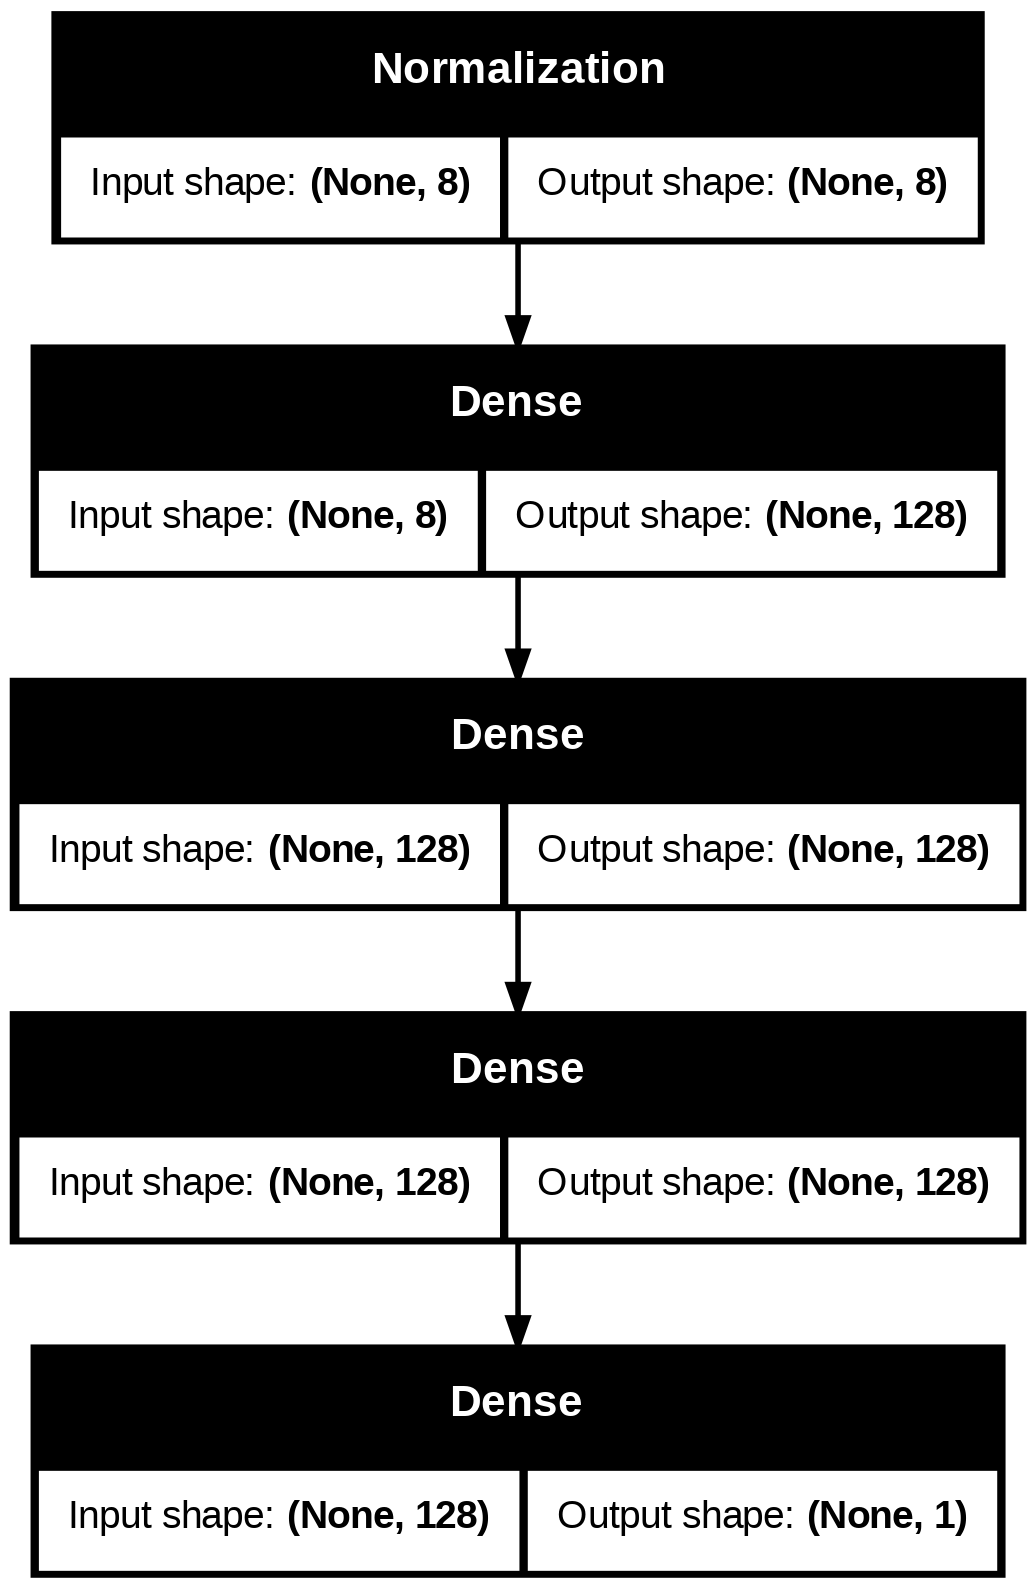

In [52]:
plot_model(model,to_file='model2.png',show_shapes=True)

In [59]:
model.compile(loss=loss,optimizer = optimizer,metrics = metrics)

In [60]:
tf.config.run_functions_eagerly(True)

In [61]:
history = model.fit(train_dataset,validation_data=val_dataset,epochs = 100,verbose=1)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 316051.0000 - root_mean_squared_error: 339465.8125 - val_loss: 315428.6250 - val_root_mean_squared_error: 340207.6875
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 315819.3750 - root_mean_squared_error: 339098.0625 - val_loss: 315391.6875 - val_root_mean_squared_error: 340173.0938
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 316145.9375 - root_mean_squared_error: 339483.1562 - val_loss: 315255.5625 - val_root_mean_squared_error: 340046.0312
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 315557.1250 - root_mean_squared_error: 338791.5938 - val_loss: 314879.8750 - val_root_mean_squared_error: 339695.7812
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 316149.9375 - root_mean_squared_error: 339399.8750 - val_loss: 314019.2188 - val_root_mean_squared_error: 338894.2188
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 314736.3750 - root_mean_squared_error: 338183.9375

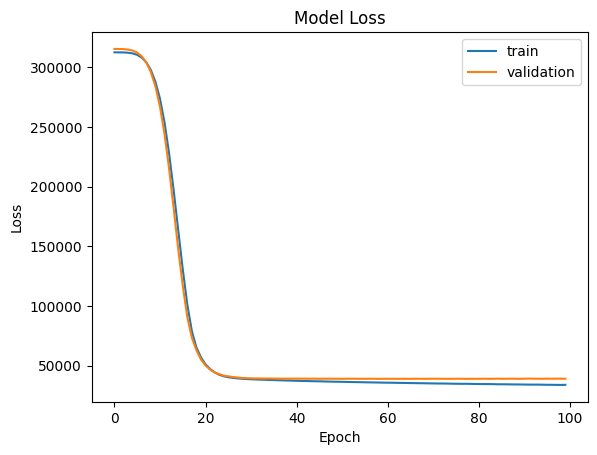

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

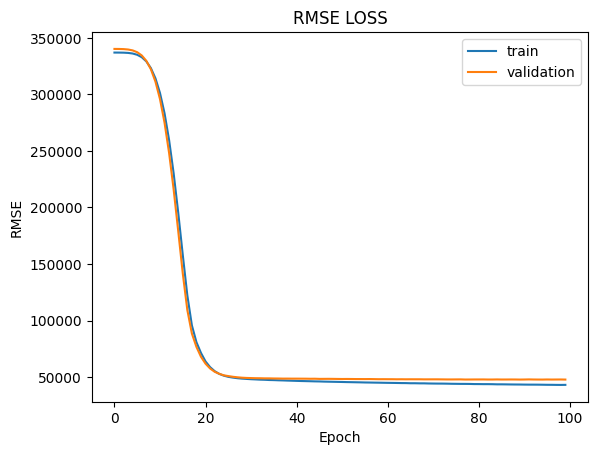

In [63]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('RMSE LOSS')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

In [66]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'min'

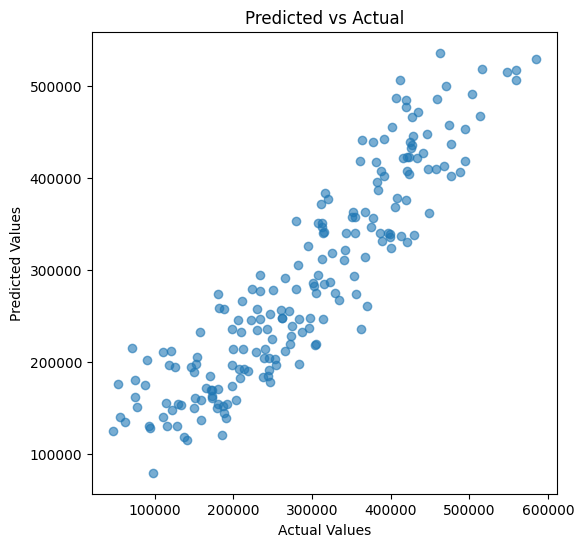

In [67]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.show()


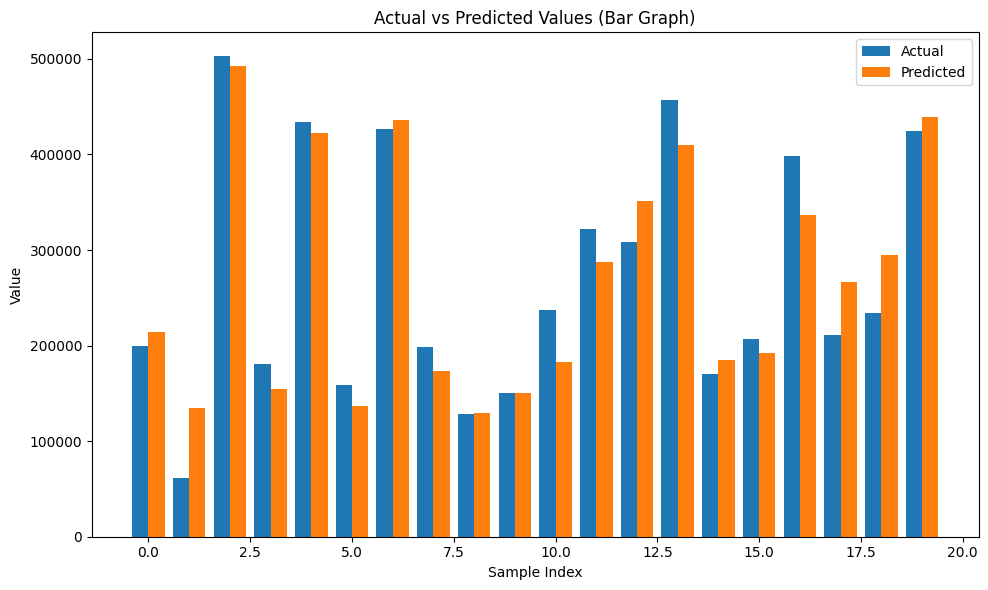

In [68]:
import numpy as np

# If y_test/y_pred are tensors, convert them to numpy
y_test = np.array(y_test).flatten()
y_pred = np.array(y_pred).flatten()

# For readability, plot only first N samples
N = 20  # you can change this value
x = np.arange(N)

plt.figure(figsize=(10,6))
plt.bar(x - 0.2, y_test[:N], width=0.4, label='Actual')
plt.bar(x + 0.2, y_pred[:N], width=0.4, label='Predicted')

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted Values (Bar Graph)")
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
from sklearn.metrics import root_mean_squared_error
print('RMSE :',root_mean_squared_error(y_test,y_pred))

RMSE : 50360.85400440346


In [72]:
model.save('model2.h5')

In [75]:
model.save_weights('model2.weights.h5')

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [77]:
!ls /content

drive	    model2.png	       second-hand-used-cars-data-set-linear-regression
model1.png  model2.weights.h5
model2.h5   sample_data


In [78]:
import shutil

In [79]:
shutil.move('/content/model2.png','/content/drive/MyDrive/Tensorflow_CarPricePrediction')
shutil.move('/content/model1.png','/content/drive/MyDrive/Tensorflow_CarPricePrediction')
shutil.move('/content/model2.h5','/content/drive/MyDrive/Tensorflow_CarPricePrediction')
shutil.move('/content/model2.weights.h5','/content/drive/MyDrive/Tensorflow_CarPricePrediction')

'/content/drive/MyDrive/Tensorflow_CarPricePrediction/model2.weights.h5'

In [80]:
!ls /content/drive/MyDrive/Tensorflow_CarPricePrediction

model1.png  model2.h5  model2.png  model2.weights.h5
